In [1]:
import numpy as np
import pandas as pd
import torch
from FXP import FXP
from utils import print_num_params

In [2]:
concat_df = pd.read_csv("./data/concat_df.csv")
rest_df = pd.read_csv("./data/rest_df.csv")

_concat_df = {}
_rest_df = {}
batteries = [5,6,7,18]
for bat in batteries:
    _concat_df[bat] = concat_df[concat_df['battery_nb'] == bat].copy().reset_index()
    _rest_df[bat] = rest_df[rest_df['battery_nb'] == bat].copy().reset_index()
    _concat_df[bat]['datetime'] = pd.to_datetime(_concat_df[bat]['datetime'])

del concat_df, rest_df

global_df = {}
for bat in batteries:
    global_df[bat] = _concat_df[bat].groupby(['charge_nb'],as_index=False).mean()[['charge_nb','interpolated_capacity']].sort_values(['charge_nb'])
    global_df[bat]['mean_previous_5'] = global_df[bat]['interpolated_capacity'].rolling(5).mean().shift(1).fillna(10)
    global_df[bat]['isPeak'] = np.where(global_df[bat]['interpolated_capacity'] > global_df[bat]['mean_previous_5'],1,0)
    global_df[bat]['x2'] = _rest_df[bat]['cc_capacity'].copy()
    global_df[bat]['x3'] = _rest_df[bat]['cv_capacity'].copy()
    global_df[bat]['rest_period'] = _rest_df[bat]['rest_period'].copy()
    temp_df = _concat_df[bat].groupby(['charge_nb']).last().reset_index()
    global_df[bat]['x4'] = temp_df['current_measured'].copy()
    global_df[bat]['x5'] = temp_df['voltage_measured'].copy()
    del temp_df
    global_df[bat].drop(['mean_previous_5'],axis=1,inplace=True)

# normalize data
column_to_norm = ['voltage_measured','current_measured','temperature_measured','interpolated_capacity']
max_values = {}
min_values = {}

full_df = pd.concat([_concat_df[bat] for bat in _concat_df],ignore_index=True)
for col in column_to_norm:
    max_values[col] =  full_df[col].max()
    min_values[col] =  full_df[col].min()
    for bat in _concat_df:
        _concat_df[bat][col]=(_concat_df[bat][col]-min_values[col])/(max_values[col]-min_values[col]) 

column_to_norm = ['x4','x5', 'interpolated_capacity']
full_df = pd.concat([global_df[bat] for bat in global_df],ignore_index=True)
for col in column_to_norm:
    if col not in max_values:
        max_values[col] =  full_df[col].max()
        min_values[col] =  full_df[col].min()
    for bat in _concat_df:
        global_df[bat][col]=(global_df[bat][col]-min_values[col])/(max_values[col]-min_values[col]) 

window_size=10
prediction_interval=1
multichannel_features = ['voltage_measured','current_measured','temperature_measured']
global_seq_features = ['x2','x3','x4','x5','isPeak','interpolated_capacity']
# global_seq_features = ['x5','isPeak','interpolated_capacity']
epochs = EPOCH = 10
BATTERIES = [5,6,7,18]
extract_points_len = 11

<ipython-input-2-ab73822b6dd0>:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  global_df[bat] = _concat_df[bat].groupby(['charge_nb'],as_index=False).mean()[['charge_nb','interpolated_capacity']].sort_values(['charge_nb'])
<ipython-input-2-ab73822b6dd0>:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  global_df[bat] = _concat_df[bat].groupby(['charge_nb'],as_index=False).mean()[['charge_nb','interpolated_capacity']].sort_values(['charge_nb'])
<ipython-input-2-ab73822b6dd0>:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will d

In [3]:
df = {}
df[5] = pd.DataFrame()
df[6] = pd.DataFrame()
df[7] = pd.DataFrame()
df[18] = pd.DataFrame()

/home/dh2409/Documents/LIB/code/nasa/FXP.py:28: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capacity = df_copy.groupby([key]).mean()[label].to_numpy().reshape(-1, 1)
/home/dh2409/Documents/LIB/code/nasa/FXP.py:28: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capacity = df_copy.groupby([key]).mean()[label].to_numpy().reshape(-1, 1)
/home/dh2409/Documents/LIB/code/nasa/FXP.py:28: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the fun

Trainable params: 10492


/home/dh2409/Documents/LIB/code/nasa/FXP.py:28: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capacity = df_copy.groupby([key]).mean()[label].to_numpy().reshape(-1, 1)
/home/dh2409/Documents/LIB/code/nasa/FXP.py:28: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capacity = df_copy.groupby([key]).mean()[label].to_numpy().reshape(-1, 1)
/home/dh2409/Documents/LIB/code/nasa/FXP.py:28: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the fun

Trainable params: 10492


/home/dh2409/Documents/LIB/code/nasa/FXP.py:28: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capacity = df_copy.groupby([key]).mean()[label].to_numpy().reshape(-1, 1)
/home/dh2409/Documents/LIB/code/nasa/FXP.py:28: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capacity = df_copy.groupby([key]).mean()[label].to_numpy().reshape(-1, 1)
/home/dh2409/Documents/LIB/code/nasa/FXP.py:28: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the fun

Trainable params: 10492


/home/dh2409/Documents/LIB/code/nasa/FXP.py:28: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capacity = df_copy.groupby([key]).mean()[label].to_numpy().reshape(-1, 1)
/home/dh2409/Documents/LIB/code/nasa/FXP.py:28: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capacity = df_copy.groupby([key]).mean()[label].to_numpy().reshape(-1, 1)
/home/dh2409/Documents/LIB/code/nasa/FXP.py:28: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the fun

Trainable params: 10492


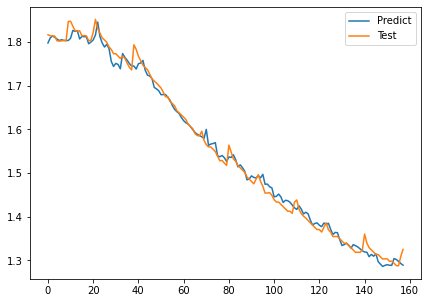

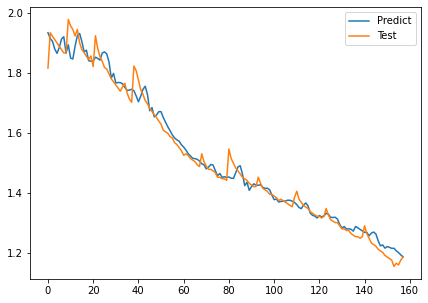

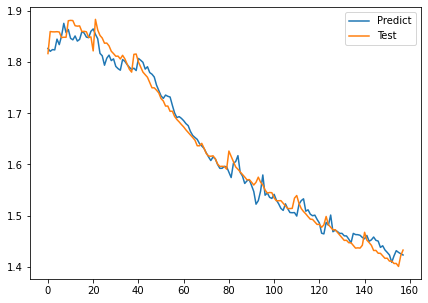

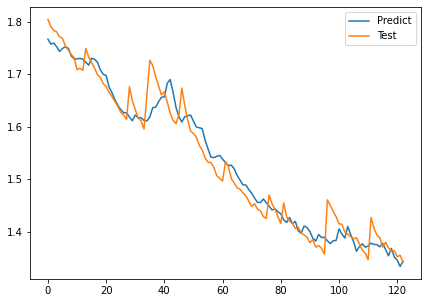

In [4]:
fxp = FXP()
multichannel_features = ['voltage_measured','current_measured','temperature_measured']
global_seq_features = ['x5','isPeak','interpolated_capacity']
for bat in BATTERIES:
    batteries = BATTERIES.copy()
    batteries.remove(bat)
    batteries = batteries + [bat]

    X_train, Y_train, X_val, Y_val, X_test,Y_test = fxp.cross_validation(batteries, _concat_df, global_df, extract_points_len=extract_points_len, multichannel_features=multichannel_features, window_size=window_size, prediction_interval=prediction_interval, global_seq_features=global_seq_features, key='charge_nb', label='interpolated_capacity', random_state=7, shuffle=False, validation=0.1)
    
    model = torch.load('FXP/' + str(batteries[-1]) + '/checkpoint.pt')
    print_num_params(model)

    pred, test = fxp.test(model, X_test, Y_test, out_dir='FXP/' + str(batteries[-1]), pin=str(batteries[-1]))
    
    df[bat]['true'] = test.numpy().flatten()
    
    df[bat]['FPX'] = pred.numpy().flatten()
    

In [5]:
from MC_LSTM import MC_LSTM

mc_lstm = MC_LSTM()
multichannel_features = ['voltage_measured','current_measured','temperature_measured']
global_seq_features = ['interpolated_capacity']
for bat in BATTERIES:
    batteries = BATTERIES.copy()
    batteries.remove(bat)
    batteries = batteries + [bat]

    X_train, Y_train, X_val, Y_val, X_test,Y_test = mc_lstm.cross_validation(batteries, _concat_df, global_df, extract_points_len=extract_points_len, multichannel_features=multichannel_features, window_size=window_size, prediction_interval=prediction_interval, global_seq_features = global_seq_features, key='charge_nb', label='interpolated_capacity', random_state=7, shuffle=False, validation=0.1)

    model = mc_lstm.build_model((X_train[0].shape[1:], X_train[1].shape[1:], X_train[2].shape[1:], X_train[3].shape[1:]))

    model.load_weights('MC_LSTM/' + str(batteries[-1]) + '/checkpoint_weight')
    pred, _ = mc_lstm.test(model, X_test, Y_test, out_dir='MC_LSTM/' + str(batteries[-1]), pin=str(batteries[-1]))
    
    df[bat]['MC_LSTM'] = pred.flatten()

/home/dh2409/Documents/LIB/code/nasa/MC_LSTM.py:48: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capacity = df_copy.groupby([key]).mean()[label].to_numpy().reshape(-1, 1)
/home/dh2409/Documents/LIB/code/nasa/MC_LSTM.py:48: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capacity = df_copy.groupby([key]).mean()[label].to_numpy().reshape(-1, 1)
/home/dh2409/Documents/LIB/code/nasa/MC_LSTM.py:48: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Voltage_Input (InputLayer)     [(None, 10, 11)]     0           []                               
                                                                                                  
 Ampere_Input (InputLayer)      [(None, 10, 11)]     0           []                               
                                                                                                  
 Temperature_Input (InputLayer)  [(None, 10, 11)]    0           []                               
                                                                                                  
 Capacity_Input (InputLayer)    [(None, 10, 1)]      0           []                               
                                                                                              

/home/dh2409/Documents/LIB/code/nasa/MC_LSTM.py:48: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capacity = df_copy.groupby([key]).mean()[label].to_numpy().reshape(-1, 1)
/home/dh2409/Documents/LIB/code/nasa/MC_LSTM.py:48: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capacity = df_copy.groupby([key]).mean()[label].to_numpy().reshape(-1, 1)
/home/dh2409/Documents/LIB/code/nasa/MC_LSTM.py:48: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Voltage_Input (InputLayer)     [(None, 10, 11)]     0           []                               
                                                                                                  
 Ampere_Input (InputLayer)      [(None, 10, 11)]     0           []                               
                                                                                                  
 Temperature_Input (InputLayer)  [(None, 10, 11)]    0           []                               
                                                                                                  
 Capacity_Input (InputLayer)    [(None, 10, 1)]      0           []                               
                                                                                            

/home/dh2409/Documents/LIB/code/nasa/MC_LSTM.py:48: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capacity = df_copy.groupby([key]).mean()[label].to_numpy().reshape(-1, 1)
/home/dh2409/Documents/LIB/code/nasa/MC_LSTM.py:48: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capacity = df_copy.groupby([key]).mean()[label].to_numpy().reshape(-1, 1)
/home/dh2409/Documents/LIB/code/nasa/MC_LSTM.py:48: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Voltage_Input (InputLayer)     [(None, 10, 11)]     0           []                               
                                                                                                  
 Ampere_Input (InputLayer)      [(None, 10, 11)]     0           []                               
                                                                                                  
 Temperature_Input (InputLayer)  [(None, 10, 11)]    0           []                               
                                                                                                  
 Capacity_Input (InputLayer)    [(None, 10, 1)]      0           []                               
                                                                                            

/home/dh2409/Documents/LIB/code/nasa/MC_LSTM.py:48: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capacity = df_copy.groupby([key]).mean()[label].to_numpy().reshape(-1, 1)
/home/dh2409/Documents/LIB/code/nasa/MC_LSTM.py:48: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capacity = df_copy.groupby([key]).mean()[label].to_numpy().reshape(-1, 1)
/home/dh2409/Documents/LIB/code/nasa/MC_LSTM.py:48: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Voltage_Input (InputLayer)     [(None, 10, 11)]     0           []                               
                                                                                                  
 Ampere_Input (InputLayer)      [(None, 10, 11)]     0           []                               
                                                                                                  
 Temperature_Input (InputLayer)  [(None, 10, 11)]    0           []                               
                                                                                                  
 Capacity_Input (InputLayer)    [(None, 10, 1)]      0           []                               
                                                                                            

/home/dh2409/Documents/LIB/code/nasa/basic_models.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_copy = concat_df.groupby(by=[key],as_index=False).mean()[[key,label]].copy()
/home/dh2409/Documents/LIB/code/nasa/basic_models.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_copy = concat_df.groupby(by=[key],as_index=False).mean()[[key,label]].copy()
/home/dh2409/Documents/LIB/code/nasa/basic_models.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only co

Trainable params: 15


/home/dh2409/Documents/LIB/code/nasa/basic_models.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_copy = concat_df.groupby(by=[key],as_index=False).mean()[[key,label]].copy()
/home/dh2409/Documents/LIB/code/nasa/basic_models.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_copy = concat_df.groupby(by=[key],as_index=False).mean()[[key,label]].copy()
/home/dh2409/Documents/LIB/code/nasa/basic_models.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only co

Trainable params: 15
Trainable params: 15


/home/dh2409/Documents/LIB/code/nasa/basic_models.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_copy = concat_df.groupby(by=[key],as_index=False).mean()[[key,label]].copy()
/home/dh2409/Documents/LIB/code/nasa/basic_models.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_copy = concat_df.groupby(by=[key],as_index=False).mean()[[key,label]].copy()
/home/dh2409/Documents/LIB/code/nasa/basic_models.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only co

Trainable params: 15


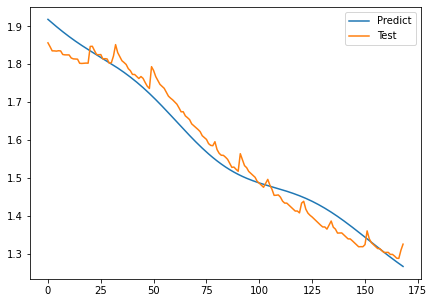

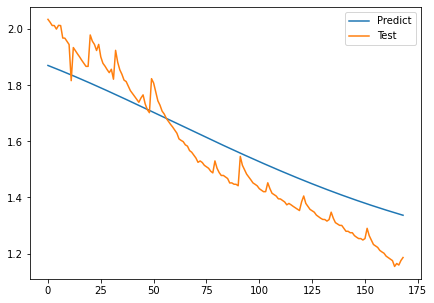

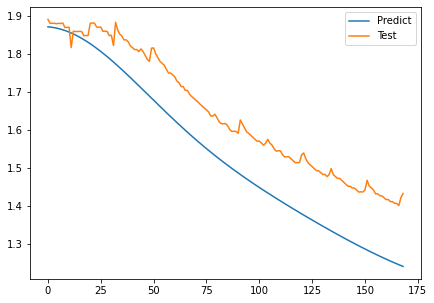

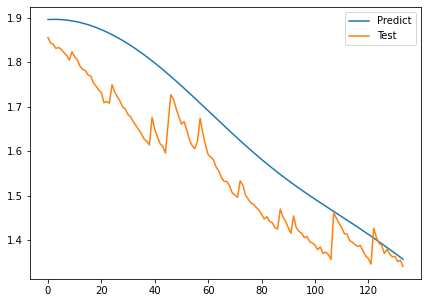

In [6]:
from basic_models import GF,Battery_SVR,MLP,Battery_LSTM

gf = GF()

for bat in BATTERIES:
    batteries = BATTERIES.copy()
    batteries.remove(bat)
    batteries = batteries + [bat]

    X_train, Y_train, X_val, Y_val, X_test,Y_test = gf.cross_validation(batteries, _concat_df, key='charge_nb', label='interpolated_capacity',validation=0.1)

    model = gf.build_model(k=5)
    print_num_params(model)

    model = torch.load('GF/' + str(batteries[-1]) + '/checkpoint.pt')

    pred, test = gf.test(model, X_test, Y_test, out_dir='GF/' + str(batteries[-1]), pin=str(batteries[-1]))
    
    df[bat]['GF'] = pred.numpy().flatten()[-len(df[bat]):]

/home/dh2409/Documents/LIB/code/nasa/basic_models.py:175: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_copy = concat_df.groupby(by=[key],as_index=False).mean()[[key, label]].copy()
/home/dh2409/Documents/LIB/code/nasa/basic_models.py:175: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_copy = concat_df.groupby(by=[key],as_index=False).mean()[[key, label]].copy()
/home/dh2409/Documents/LIB/code/nasa/basic_models.py:175: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select on

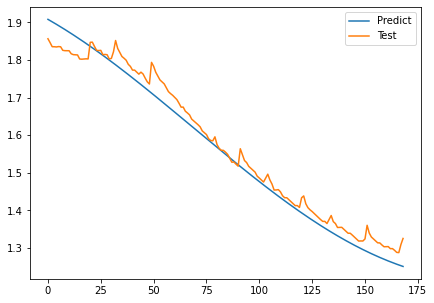

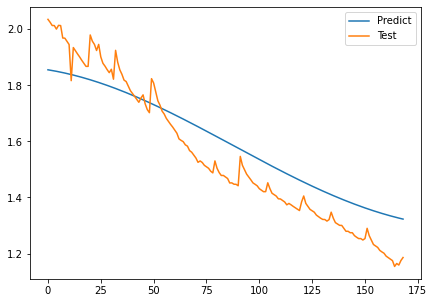

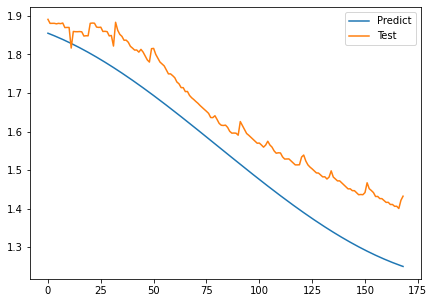

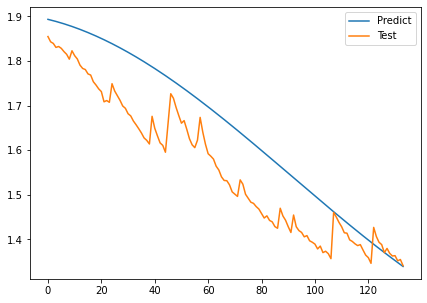

In [7]:
svr = Battery_SVR()

for bat in BATTERIES:
    batteries = BATTERIES.copy()
    batteries.remove(bat)
    batteries = batteries + [bat]

    X_train, Y_train, X_val, Y_val, X_test,Y_test = svr.cross_validation(batteries, _concat_df, key='charge_nb', label='interpolated_capacity', validation=0.1)

    model = svr.load_model('SVR/' + str(batteries[-1]) + '/checkpoint.pkl')

    pred, test = svr.test(model, X_test, Y_test, out_dir='SVR/' + str(batteries[-1]), pin=str(batteries[-1]))

    df[bat]['SVR'] = pred.flatten()[-len(df[bat]):]

/home/dh2409/Documents/LIB/code/nasa/basic_models.py:284: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capacity = df_copy.groupby([key]).mean()[label].to_numpy().reshape(-1, 1)
/home/dh2409/Documents/LIB/code/nasa/basic_models.py:284: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capacity = df_copy.groupby([key]).mean()[label].to_numpy().reshape(-1, 1)
/home/dh2409/Documents/LIB/code/nasa/basic_models.py:284: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns whi

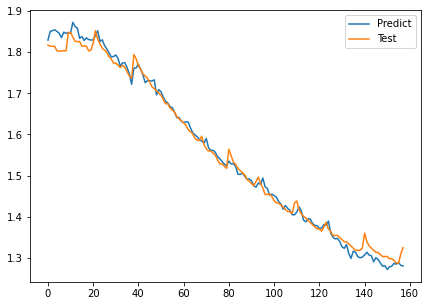

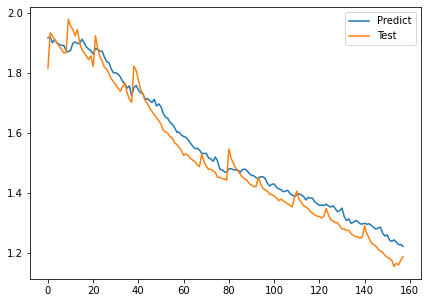

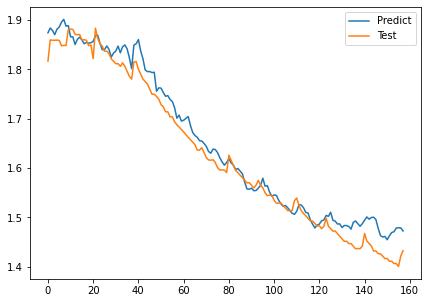

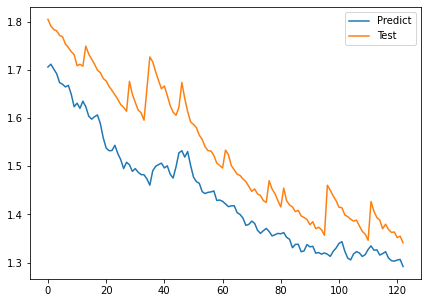

In [8]:
mlp = MLP()
multichannel_features = ['voltage_measured','current_measured','temperature_measured']
global_seq_features = ['x2','x3','x4','x5','isPeak','interpolated_capacity']
for bat in BATTERIES:
    batteries = BATTERIES.copy()
    batteries.remove(bat)
    batteries = batteries + [bat]

    X_train, Y_train, X_val, Y_val, X_test,Y_test = mlp.cross_validation(batteries, _concat_df, global_df, extract_points_len=extract_points_len, multichannel_features=multichannel_features, window_size=window_size, prediction_interval=prediction_interval, global_seq_features = global_seq_features, key='charge_nb', label='interpolated_capacity', random_state=7, shuffle=False, validation=0.1)

    model  = torch.load('MLP/' + str(batteries[-1])+ '/checkpoint.pt')

    pred, test = mlp.test(model, X_test, Y_test, out_dir='MLP/' + str(batteries[-1]), pin=str(batteries[-1]))
    
    df[bat]['MLP'] = pred.numpy().flatten()

/home/dh2409/Documents/LIB/code/nasa/basic_models.py:496: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capacity = df_copy.groupby([key]).mean()[label].to_numpy().reshape(-1, 1)
/home/dh2409/Documents/LIB/code/nasa/basic_models.py:496: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capacity = df_copy.groupby([key]).mean()[label].to_numpy().reshape(-1, 1)
/home/dh2409/Documents/LIB/code/nasa/basic_models.py:496: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns whi

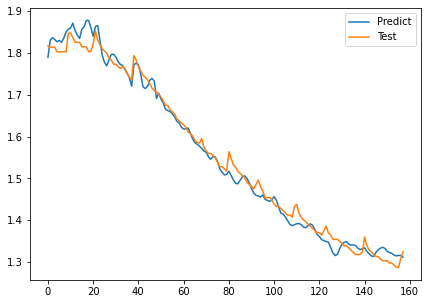

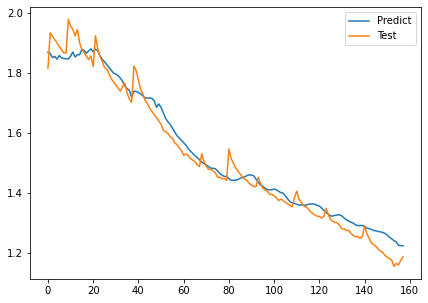

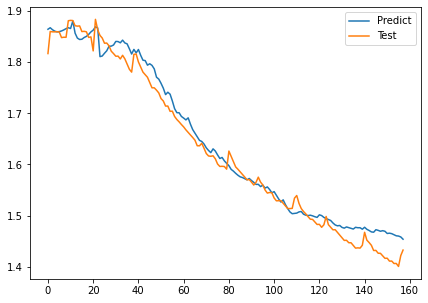

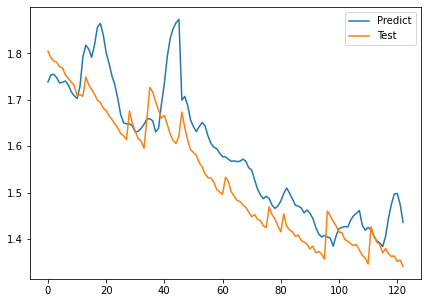

In [9]:
lstm = Battery_LSTM()
global_seq_features = ['x2','x3','x4','x5','rest_period','interpolated_capacity']
for bat in BATTERIES:
    batteries = BATTERIES.copy()
    batteries.remove(bat)
    batteries = batteries + [bat]

    X_train, Y_train, X_val, Y_val, X_test,Y_test = lstm.cross_validation(batteries, _concat_df, global_df, extract_points_len=extract_points_len, multichannel_features=multichannel_features, window_size=window_size, prediction_interval=prediction_interval, global_seq_features = global_seq_features, key='charge_nb', label='interpolated_capacity', random_state=7, shuffle=False, validation=0.1)

    model  = torch.load('LSTM/' + str(batteries[-1])+ '/checkpoint.pt')

    pred, test = lstm.test(model, X_test, Y_test, out_dir='LSTM/' + str(batteries[-1]), pin=str(batteries[-1]))
    
    df[bat]['LSTM'] = pred.flatten()

In [10]:
df[5]

,true,FPX,MC_LSTM,GF,SVR,MLP,LSTM
0,1.816587,1.797688,1.800545,1.868947,1.870428,1.828878,1.789510
1,1.814202,1.809219,1.800914,1.864924,1.866779,1.850070,1.830350
2,1.813752,1.813690,1.802539,1.860984,1.863096,1.851691,1.836290
3,1.813441,1.810746,1.791894,1.857122,1.859378,1.853910,1.832091
4,1.802598,1.806680,1.795603,1.853336,1.855626,1.849806,1.826545
...,...,...,...,...,...,...,...
153,1.293464,1.304044,1.325805,1.282276,1.258659,1.286500,1.317247
154,1.288003,1.302052,1.324270,1.278175,1.256574,1.284821,1.314910
155,1.287453,1.297673,1.321652,1.274130,1.254537,1.288453,1.316316
156,1.309015,1.292684,1.319977,1.270146,1.252548,1.282020,1.315785


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

[]

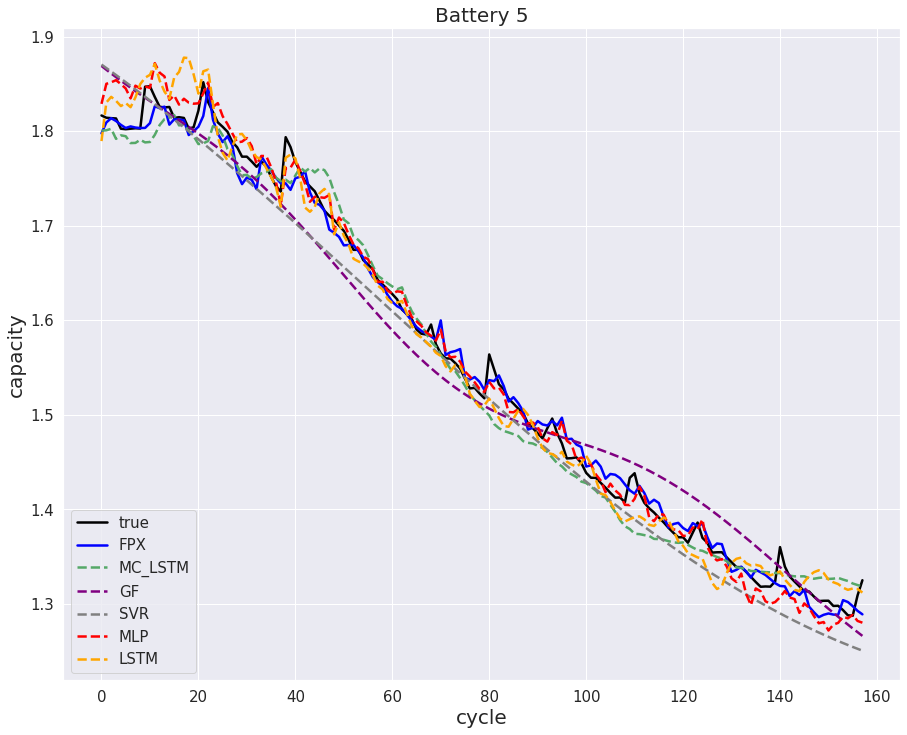

In [25]:
fig, ax = plt.subplots(1,1,figsize=(15,12))
# df['CS2_35'].rename(columns={'truth': 'true'}, inplace=True)
i,j=0,0
plt.rc('font', size=20)
for bat in [5]:
    sns.set(font_scale=2)
    sns.lineplot(data=df[bat]['true'],color='black',linewidth=2.5,ax=ax)
    sns.lineplot(data=df[bat]['FPX'],color='blue',linewidth=2.5,ax=ax)
    sns.lineplot(data=df[bat]['MC_LSTM'],color='g',linewidth=2.5,linestyle="--",ax=ax)
    sns.lineplot(data=df[bat]['GF'],color='purple',linewidth=2.5,linestyle="--",ax=ax)
    sns.lineplot(data=df[bat]['SVR'],color='gray',linewidth=2.5,linestyle="--",ax=ax)
    sns.lineplot(data=df[bat]['MLP'],color='red',linewidth=2.5,linestyle="--",ax=ax)
    sns.lineplot(data=df[bat]['LSTM'],color='orange',linewidth=2.5,linestyle="--",ax=ax)
    ax.legend(['true','FPX','MC_LSTM','GF','SVR','MLP','LSTM'],fontsize=15,loc='lower left')
    ax.set_xlabel('cycle',fontsize=20)
    ax.set_ylabel('capacity',fontsize=20)
    ax.set_title("Battery " + str(bat),fontsize=20)
    j += 1
    if j > 1:
        j = 0
        i += 1
# plt.suptitle("Cycle 200-450",fontsize=25)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.plot()

[]

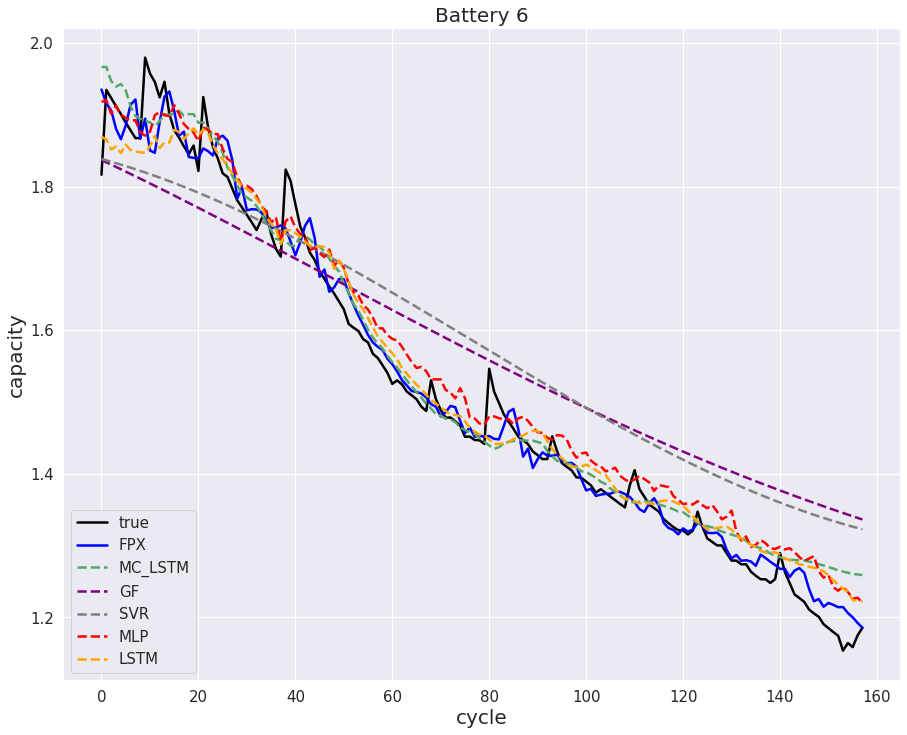

In [26]:
fig, ax = plt.subplots(1,1,figsize=(15,12))
# df['CS2_35'].rename(columns={'truth': 'true'}, inplace=True)
i,j=0,0
plt.rc('font', size=20)
for bat in [6]:
    sns.set(font_scale=2)
    sns.lineplot(data=df[bat]['true'],color='black',linewidth=2.5,ax=ax)
    sns.lineplot(data=df[bat]['FPX'],color='blue',linewidth=2.5,ax=ax)
    sns.lineplot(data=df[bat]['MC_LSTM'],color='g',linewidth=2.5,linestyle="--",ax=ax)
    sns.lineplot(data=df[bat]['GF'],color='purple',linewidth=2.5,linestyle="--",ax=ax)
    sns.lineplot(data=df[bat]['SVR'],color='gray',linewidth=2.5,linestyle="--",ax=ax)
    sns.lineplot(data=df[bat]['MLP'],color='red',linewidth=2.5,linestyle="--",ax=ax)
    sns.lineplot(data=df[bat]['LSTM'],color='orange',linewidth=2.5,linestyle="--",ax=ax)
    ax.legend(['true','FPX','MC_LSTM','GF','SVR','MLP','LSTM'],fontsize=15,loc='lower left')
    ax.set_xlabel('cycle',fontsize=20)
    ax.set_ylabel('capacity',fontsize=20)
    ax.set_title("Battery " + str(bat),fontsize=20)
    j += 1
    if j > 1:
        j = 0
        i += 1
# plt.suptitle("Cycle 200-450",fontsize=25)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.plot()

[]

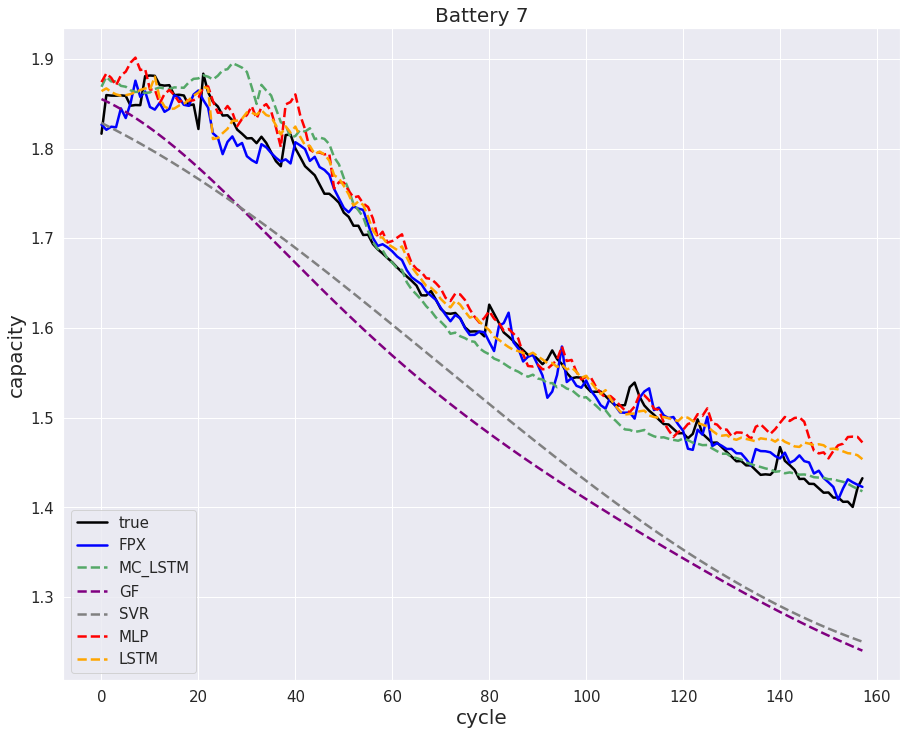

In [27]:
fig, ax = plt.subplots(1,1,figsize=(15,12))
# df['CS2_35'].rename(columns={'truth': 'true'}, inplace=True)
i,j=0,0
plt.rc('font', size=20)
for bat in [7]:
    sns.set(font_scale=2)
    sns.lineplot(data=df[bat]['true'],color='black',linewidth=2.5,ax=ax)
    sns.lineplot(data=df[bat]['FPX'],color='blue',linewidth=2.5,ax=ax)
    sns.lineplot(data=df[bat]['MC_LSTM'],color='g',linewidth=2.5,linestyle="--",ax=ax)
    sns.lineplot(data=df[bat]['GF'],color='purple',linewidth=2.5,linestyle="--",ax=ax)
    sns.lineplot(data=df[bat]['SVR'],color='gray',linewidth=2.5,linestyle="--",ax=ax)
    sns.lineplot(data=df[bat]['MLP'],color='red',linewidth=2.5,linestyle="--",ax=ax)
    sns.lineplot(data=df[bat]['LSTM'],color='orange',linewidth=2.5,linestyle="--",ax=ax)
    ax.legend(['true','FPX','MC_LSTM','GF','SVR','MLP','LSTM'],fontsize=15,loc='lower left')
    ax.set_xlabel('cycle',fontsize=20)
    ax.set_ylabel('capacity',fontsize=20)
    ax.set_title("Battery " + str(bat),fontsize=20)
    j += 1
    if j > 1:
        j = 0
        i += 1
# plt.suptitle("Cycle 200-450",fontsize=25)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.plot()

[]

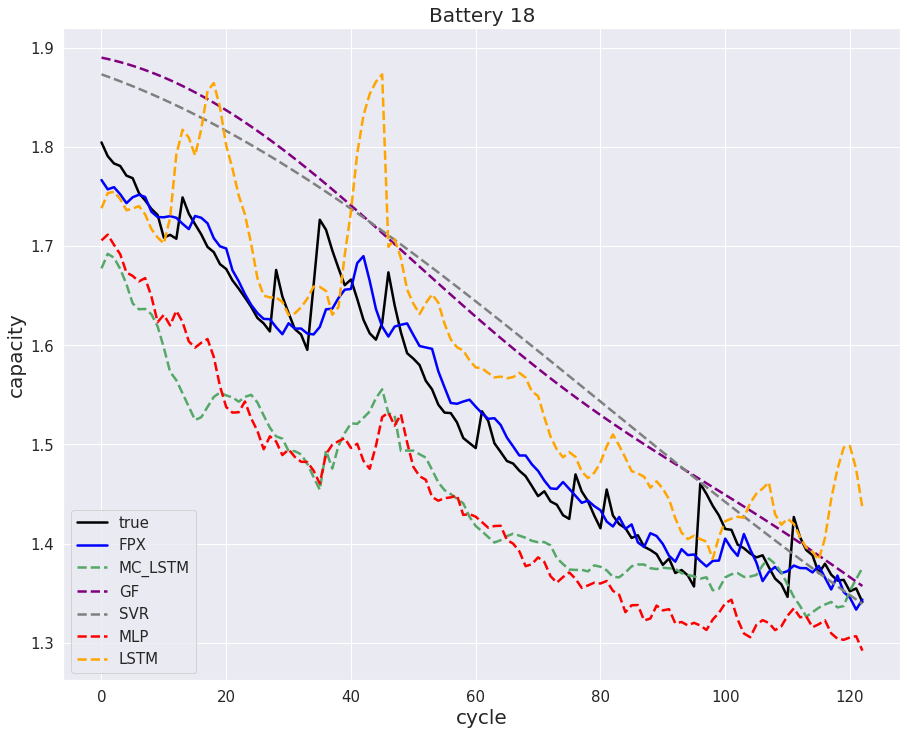

In [28]:
fig, ax = plt.subplots(1,1,figsize=(15,12))
# df['CS2_35'].rename(columns={'truth': 'true'}, inplace=True)
i,j=0,0
plt.rc('font', size=20)
for bat in [18]:
    sns.set(font_scale=2)
    sns.lineplot(data=df[bat]['true'],color='black',linewidth=2.5,ax=ax)
    sns.lineplot(data=df[bat]['FPX'],color='blue',linewidth=2.5,ax=ax)
    sns.lineplot(data=df[bat]['MC_LSTM'],color='g',linewidth=2.5,linestyle="--",ax=ax)
    sns.lineplot(data=df[bat]['GF'],color='purple',linewidth=2.5,linestyle="--",ax=ax)
    sns.lineplot(data=df[bat]['SVR'],color='gray',linewidth=2.5,linestyle="--",ax=ax)
    sns.lineplot(data=df[bat]['MLP'],color='red',linewidth=2.5,linestyle="--",ax=ax)
    sns.lineplot(data=df[bat]['LSTM'],color='orange',linewidth=2.5,linestyle="--",ax=ax)
    ax.legend(['true','FPX','MC_LSTM','GF','SVR','MLP','LSTM'],fontsize=15,loc='lower left')
    ax.set_xlabel('cycle',fontsize=20)
    ax.set_ylabel('capacity',fontsize=20)
    ax.set_title("Battery " + str(bat),fontsize=20)
    j += 1
    if j > 1:
        j = 0
        i += 1
# plt.suptitle("Cycle 200-450",fontsize=25)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.plot()

[]

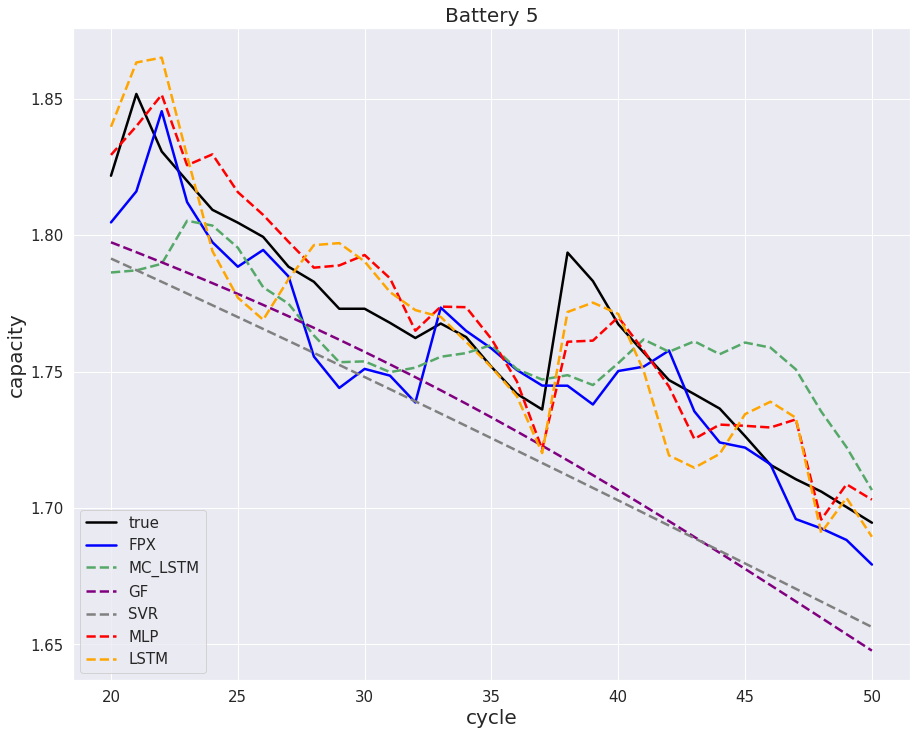

In [34]:
fig, ax = plt.subplots(1,1,figsize=(15,12))
# df['CS2_35'].rename(columns={'truth': 'true'}, inplace=True)
i,j=0,0
plt.rc('font', size=20)
for bat in [5]:
    sns.set(font_scale=2)
    sns.lineplot(data=df[bat].loc[20:50,'true'],color='black',linewidth=2.5,ax=ax)
    sns.lineplot(data=df[bat].loc[20:50,'FPX'],color='blue',linewidth=2.5,ax=ax)
    sns.lineplot(data=df[bat].loc[20:50,'MC_LSTM'],color='g',linewidth=2.5,linestyle="--",ax=ax)
    sns.lineplot(data=df[bat].loc[20:50,'GF'],color='purple',linewidth=2.5,linestyle="--",ax=ax)
    sns.lineplot(data=df[bat].loc[20:50,'SVR'],color='gray',linewidth=2.5,linestyle="--",ax=ax)
    sns.lineplot(data=df[bat].loc[20:50,'MLP'],color='red',linewidth=2.5,linestyle="--",ax=ax)
    sns.lineplot(data=df[bat].loc[20:50,'LSTM'],color='orange',linewidth=2.5,linestyle="--",ax=ax)
    ax.legend(['true','FPX','MC_LSTM','GF','SVR','MLP','LSTM'],fontsize=15,loc='lower left')
    ax.set_xlabel('cycle',fontsize=20)
    ax.set_ylabel('capacity',fontsize=20)
    ax.set_title("Battery " + str(bat),fontsize=20)
    j += 1
    if j > 1:
        j = 0
        i += 1
# plt.suptitle("Cycle 200-450",fontsize=25)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.plot()

[]

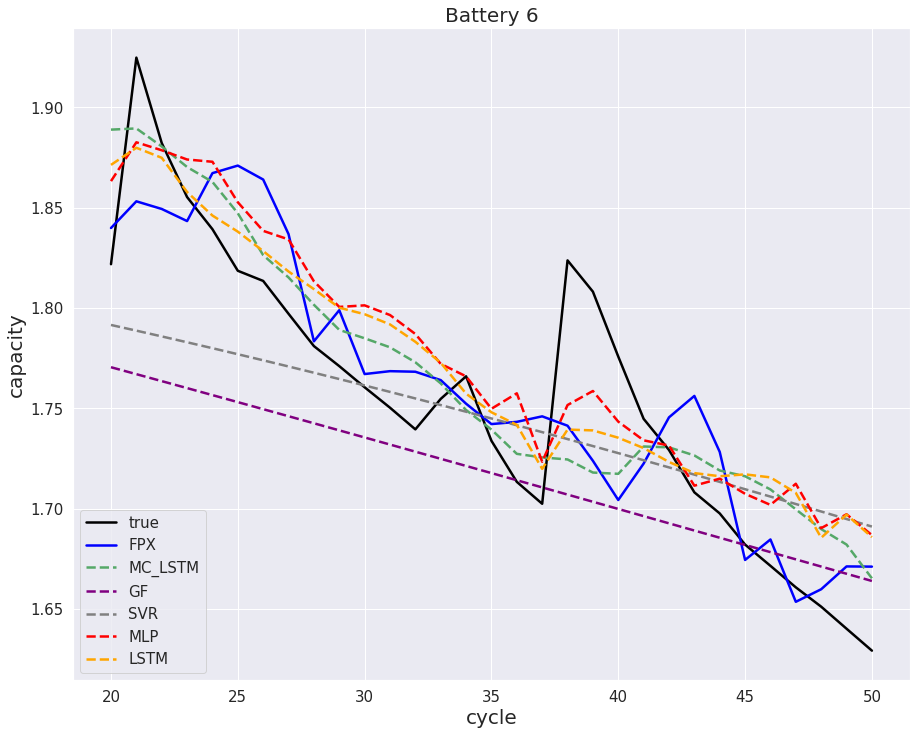

In [35]:
fig, ax = plt.subplots(1,1,figsize=(15,12))
# df['CS2_35'].rename(columns={'truth': 'true'}, inplace=True)
i,j=0,0
plt.rc('font', size=20)
for bat in [6]:
    sns.set(font_scale=2)
    sns.lineplot(data=df[bat].loc[20:50,'true'],color='black',linewidth=2.5,ax=ax)
    sns.lineplot(data=df[bat].loc[20:50,'FPX'],color='blue',linewidth=2.5,ax=ax)
    sns.lineplot(data=df[bat].loc[20:50,'MC_LSTM'],color='g',linewidth=2.5,linestyle="--",ax=ax)
    sns.lineplot(data=df[bat].loc[20:50,'GF'],color='purple',linewidth=2.5,linestyle="--",ax=ax)
    sns.lineplot(data=df[bat].loc[20:50,'SVR'],color='gray',linewidth=2.5,linestyle="--",ax=ax)
    sns.lineplot(data=df[bat].loc[20:50,'MLP'],color='red',linewidth=2.5,linestyle="--",ax=ax)
    sns.lineplot(data=df[bat].loc[20:50,'LSTM'],color='orange',linewidth=2.5,linestyle="--",ax=ax)
    ax.legend(['true','FPX','MC_LSTM','GF','SVR','MLP','LSTM'],fontsize=15,loc='lower left')
    ax.set_xlabel('cycle',fontsize=20)
    ax.set_ylabel('capacity',fontsize=20)
    ax.set_title("Battery " + str(bat),fontsize=20)
    j += 1
    if j > 1:
        j = 0
        i += 1
# plt.suptitle("Cycle 200-450",fontsize=25)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.plot()

[]

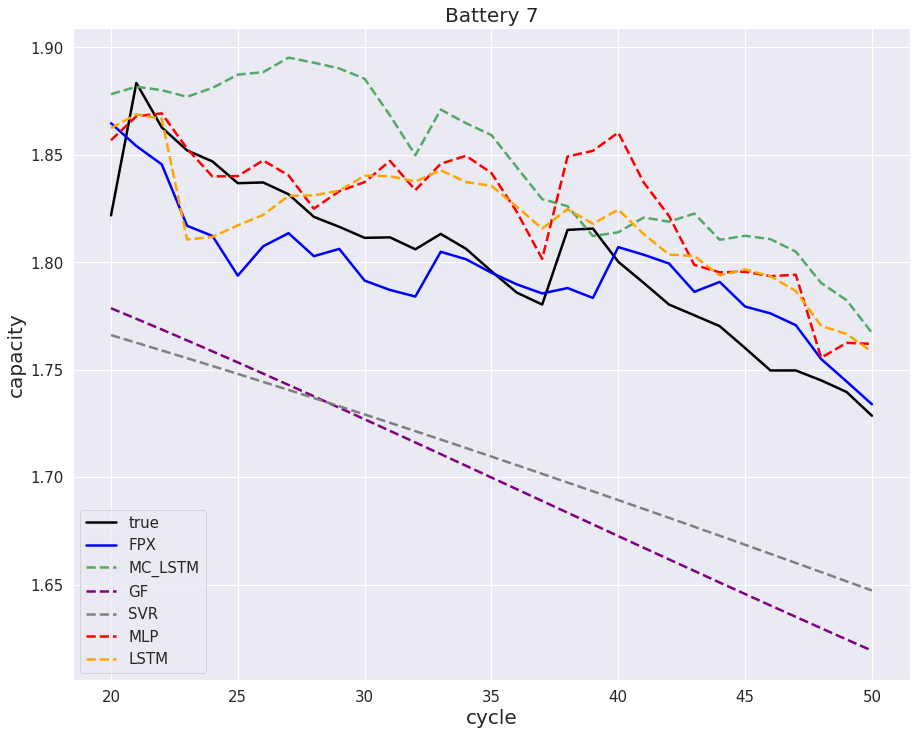

In [36]:
fig, ax = plt.subplots(1,1,figsize=(15,12))
# df['CS2_35'].rename(columns={'truth': 'true'}, inplace=True)
i,j=0,0
plt.rc('font', size=20)
for bat in [7]:
    sns.set(font_scale=2)
    sns.lineplot(data=df[bat].loc[20:50,'true'],color='black',linewidth=2.5,ax=ax)
    sns.lineplot(data=df[bat].loc[20:50,'FPX'],color='blue',linewidth=2.5,ax=ax)
    sns.lineplot(data=df[bat].loc[20:50,'MC_LSTM'],color='g',linewidth=2.5,linestyle="--",ax=ax)
    sns.lineplot(data=df[bat].loc[20:50,'GF'],color='purple',linewidth=2.5,linestyle="--",ax=ax)
    sns.lineplot(data=df[bat].loc[20:50,'SVR'],color='gray',linewidth=2.5,linestyle="--",ax=ax)
    sns.lineplot(data=df[bat].loc[20:50,'MLP'],color='red',linewidth=2.5,linestyle="--",ax=ax)
    sns.lineplot(data=df[bat].loc[20:50,'LSTM'],color='orange',linewidth=2.5,linestyle="--",ax=ax)
    ax.legend(['true','FPX','MC_LSTM','GF','SVR','MLP','LSTM'],fontsize=15,loc='lower left')
    ax.set_xlabel('cycle',fontsize=20)
    ax.set_ylabel('capacity',fontsize=20)
    ax.set_title("Battery " + str(bat),fontsize=20)
    j += 1
    if j > 1:
        j = 0
        i += 1
# plt.suptitle("Cycle 200-450",fontsize=25)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.plot()

[]

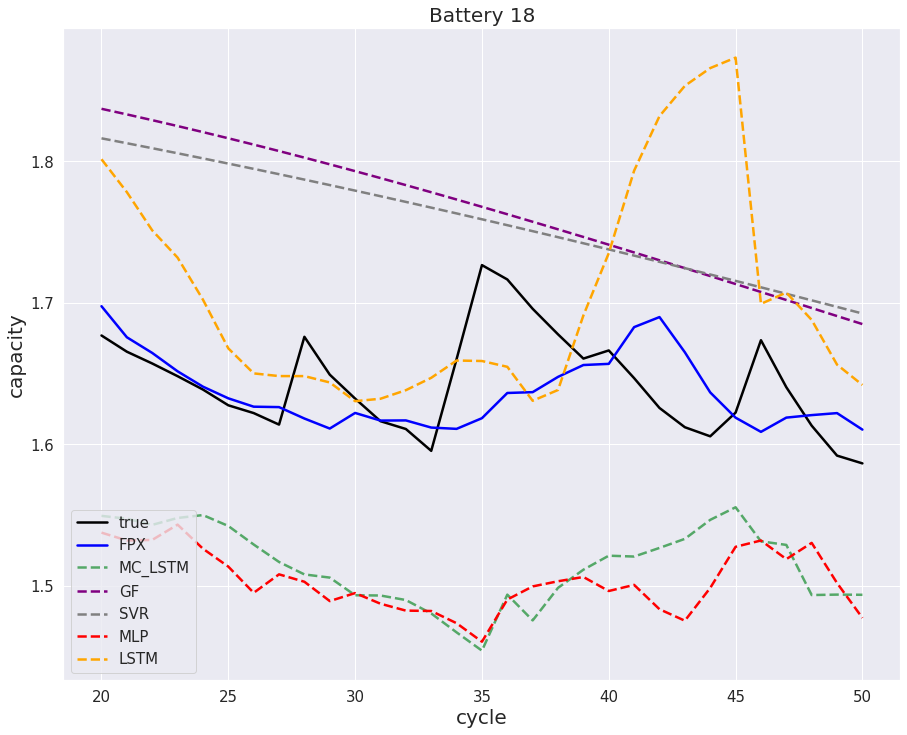

In [37]:
fig, ax = plt.subplots(1,1,figsize=(15,12))
# df['CS2_35'].rename(columns={'truth': 'true'}, inplace=True)
i,j=0,0
plt.rc('font', size=20)
for bat in [18]:
    sns.set(font_scale=2)
    sns.lineplot(data=df[bat].loc[20:50,'true'],color='black',linewidth=2.5,ax=ax)
    sns.lineplot(data=df[bat].loc[20:50,'FPX'],color='blue',linewidth=2.5,ax=ax)
    sns.lineplot(data=df[bat].loc[20:50,'MC_LSTM'],color='g',linewidth=2.5,linestyle="--",ax=ax)
    sns.lineplot(data=df[bat].loc[20:50,'GF'],color='purple',linewidth=2.5,linestyle="--",ax=ax)
    sns.lineplot(data=df[bat].loc[20:50,'SVR'],color='gray',linewidth=2.5,linestyle="--",ax=ax)
    sns.lineplot(data=df[bat].loc[20:50,'MLP'],color='red',linewidth=2.5,linestyle="--",ax=ax)
    sns.lineplot(data=df[bat].loc[20:50,'LSTM'],color='orange',linewidth=2.5,linestyle="--",ax=ax)
    ax.legend(['true','FPX','MC_LSTM','GF','SVR','MLP','LSTM'],fontsize=15,loc='lower left')
    ax.set_xlabel('cycle',fontsize=20)
    ax.set_ylabel('capacity',fontsize=20)
    ax.set_title("Battery " + str(bat),fontsize=20)
    j += 1
    if j > 1:
        j = 0
        i += 1
# plt.suptitle("Cycle 200-450",fontsize=25)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.plot()

In [31]:
# fig, ax = plt.subplots(2,2,figsize=(30,24))
# # df['CS2_35'].rename(columns={'truth': 'true'}, inplace=True)
# i,j=0,0
# for bat in df:
#     sns.lineplot(data=df[bat].loc[200:450,'true'],color='black',ax=ax[i,j])
#     sns.lineplot(data=df[bat].loc[200:450,'FPX'],color='blue',ax=ax[i,j])
#     sns.lineplot(data=df[bat].loc[200:450,'MC_LSTM'],color='g',linestyle="--",ax=ax[i,j])
#     sns.lineplot(data=df[bat].loc[200:450,'GF'],color='purple',linestyle="--",ax=ax[i,j])
#     sns.lineplot(data=df[bat].loc[200:450,'SVR'],color='gray',linestyle="--",ax=ax[i,j])
#     sns.lineplot(data=df[bat].loc[200:450,'MLP'],color='red',linestyle="--",ax=ax[i,j])
#     sns.lineplot(data=df[bat].loc[200:450,'LSTM'],color='orange',linestyle="--",ax=ax[i,j])
#     ax[i,j].legend(['true','FPX','MC_LSTM','GF','SVR','MLP','LSTM'],fontsize=20)
#     ax[i,j].set_xlabel('cycle',fontsize=20)
#     ax[i,j].set_ylabel('capacity',fontsize=20)
#     ax[i,j].set_title(bat,fontsize=20)
#     j += 1
#     if j > 1:
#         j = 0
#         i += 1
# plt.suptitle("Cycle 200-450",fontsize=25)

# plt.plot()

In [30]:
# fig, ax = plt.subplots(2,2,figsize=(30,24))
# # df['CS2_35'].rename(columns={'truth': 'true'}, inplace=True)
# i,j=0,0
# for bat in df:
#     sns.lineplot(data=df[bat].loc[110:140,'true'],color='black',ax=ax[i,j])
#     sns.lineplot(data=df[bat].loc[110:140,'FPX'],color='blue',ax=ax[i,j])
#     sns.lineplot(data=df[bat].loc[110:140,'MC_LSTM'],color='g',linestyle="--",ax=ax[i,j])
#     sns.lineplot(data=df[bat].loc[110:140,'GF'],color='purple',linestyle="--",ax=ax[i,j])
#     sns.lineplot(data=df[bat].loc[110:140,'SVR'],color='gray',linestyle="--",ax=ax[i,j])
#     sns.lineplot(data=df[bat].loc[110:140,'MLP'],color='red',linestyle="--",ax=ax[i,j])
#     sns.lineplot(data=df[bat].loc[110:140,'LSTM'],color='orange',linestyle="--",ax=ax[i,j])
# #     ax[i,j].legend(['true','FPX','MC_LSTM','GF','SVR','MLP','LSTM'],fontsize=20)
# #     ax[i,j].set_xlabel('cycle',fontsize=20)
#     ax[i,j].set_ylabel(None)
# #     ax[i,j].set_ylabel('capacity',fontsize=20)
# #     ax[i,j].set_title(bat,fontsize=20)
#     j += 1
#     if j > 1:
#         j = 0
#         i += 1
# plt.suptitle("Cycle 110-140",fontsize=25)

# plt.plot()

In [29]:
# fig, ax = plt.subplots(2,2,figsize=(30,24))
# # df['CS2_35'].rename(columns={'truth': 'true'}, inplace=True)
# i,j=0,0
# for bat in df:
#     sns.lineplot(data=df[bat].loc[70:100,'true'],color='black',ax=ax[i,j])
#     sns.lineplot(data=df[bat].loc[70:100,'FPX'],color='blue',ax=ax[i,j])
#     sns.lineplot(data=df[bat].loc[70:100,'MC_LSTM'],color='g',linestyle="--",ax=ax[i,j])
#     sns.lineplot(data=df[bat].loc[70:100,'GF'],color='purple',linestyle="--",ax=ax[i,j])
#     sns.lineplot(data=df[bat].loc[70:100,'SVR'],color='gray',linestyle="--",ax=ax[i,j])
#     sns.lineplot(data=df[bat].loc[70:100,'MLP'],color='red',linestyle="--",ax=ax[i,j])
#     sns.lineplot(data=df[bat].loc[70:100,'LSTM'],color='orange',linestyle="--",ax=ax[i,j])
#     ax[i,j].legend(['true','FPX','MC_LSTM','GF','SVR','MLP','LSTM'],fontsize=20)
#     ax[i,j].set_xlabel('cycle',fontsize=20)
#     ax[i,j].set_ylabel('capacity',fontsize=20)
#     ax[i,j].set_title(bat,fontsize=20)
#     j += 1
#     if j > 1:
#         j = 0
#         i += 1
# plt.suptitle("Cycle 70-100",fontsize=25)

# plt.plot()

In [32]:
# fig, ax = plt.subplots(2,2,figsize=(30,24))
# # df['CS2_35'].rename(columns={'truth': 'true'}, inplace=True)
# i,j=0,0
# for bat in df:
#     sns.lineplot(data=df[bat].loc[20:50,'true'],color='black',ax=ax[i,j])
#     sns.lineplot(data=df[bat].loc[20:50,'FPX'],color='blue',ax=ax[i,j])
#     sns.lineplot(data=df[bat].loc[20:50,'MC_LSTM'],color='g',linestyle="--",ax=ax[i,j])
#     sns.lineplot(data=df[bat].loc[20:50,'GF'],color='purple',linestyle="--",ax=ax[i,j])
#     sns.lineplot(data=df[bat].loc[20:50,'SVR'],color='gray',linestyle="--",ax=ax[i,j])
#     sns.lineplot(data=df[bat].loc[20:50,'MLP'],color='red',linestyle="--",ax=ax[i,j])
#     sns.lineplot(data=df[bat].loc[20:50,'LSTM'],color='orange',linestyle="--",ax=ax[i,j])
# #     ax[i,j].legend(['true','FPX','MC_LSTM','GF','SVR','MLP','LSTM'],fontsize=20)
# #     ax[i,j].set_xlabel('cycle',fontsize=20)
# #     ax[i,j].set_ylabel('capacity',fontsize=20)
# #     ax[i,j].set_title(bat,fontsize=20)
#     ax[i,j].set_ylabel(None)
#     j += 1
#     if j > 1:
#         j = 0
#         i += 1
# plt.suptitle("Cycle 20-50",fontsize=25)

# plt.plot()

[]

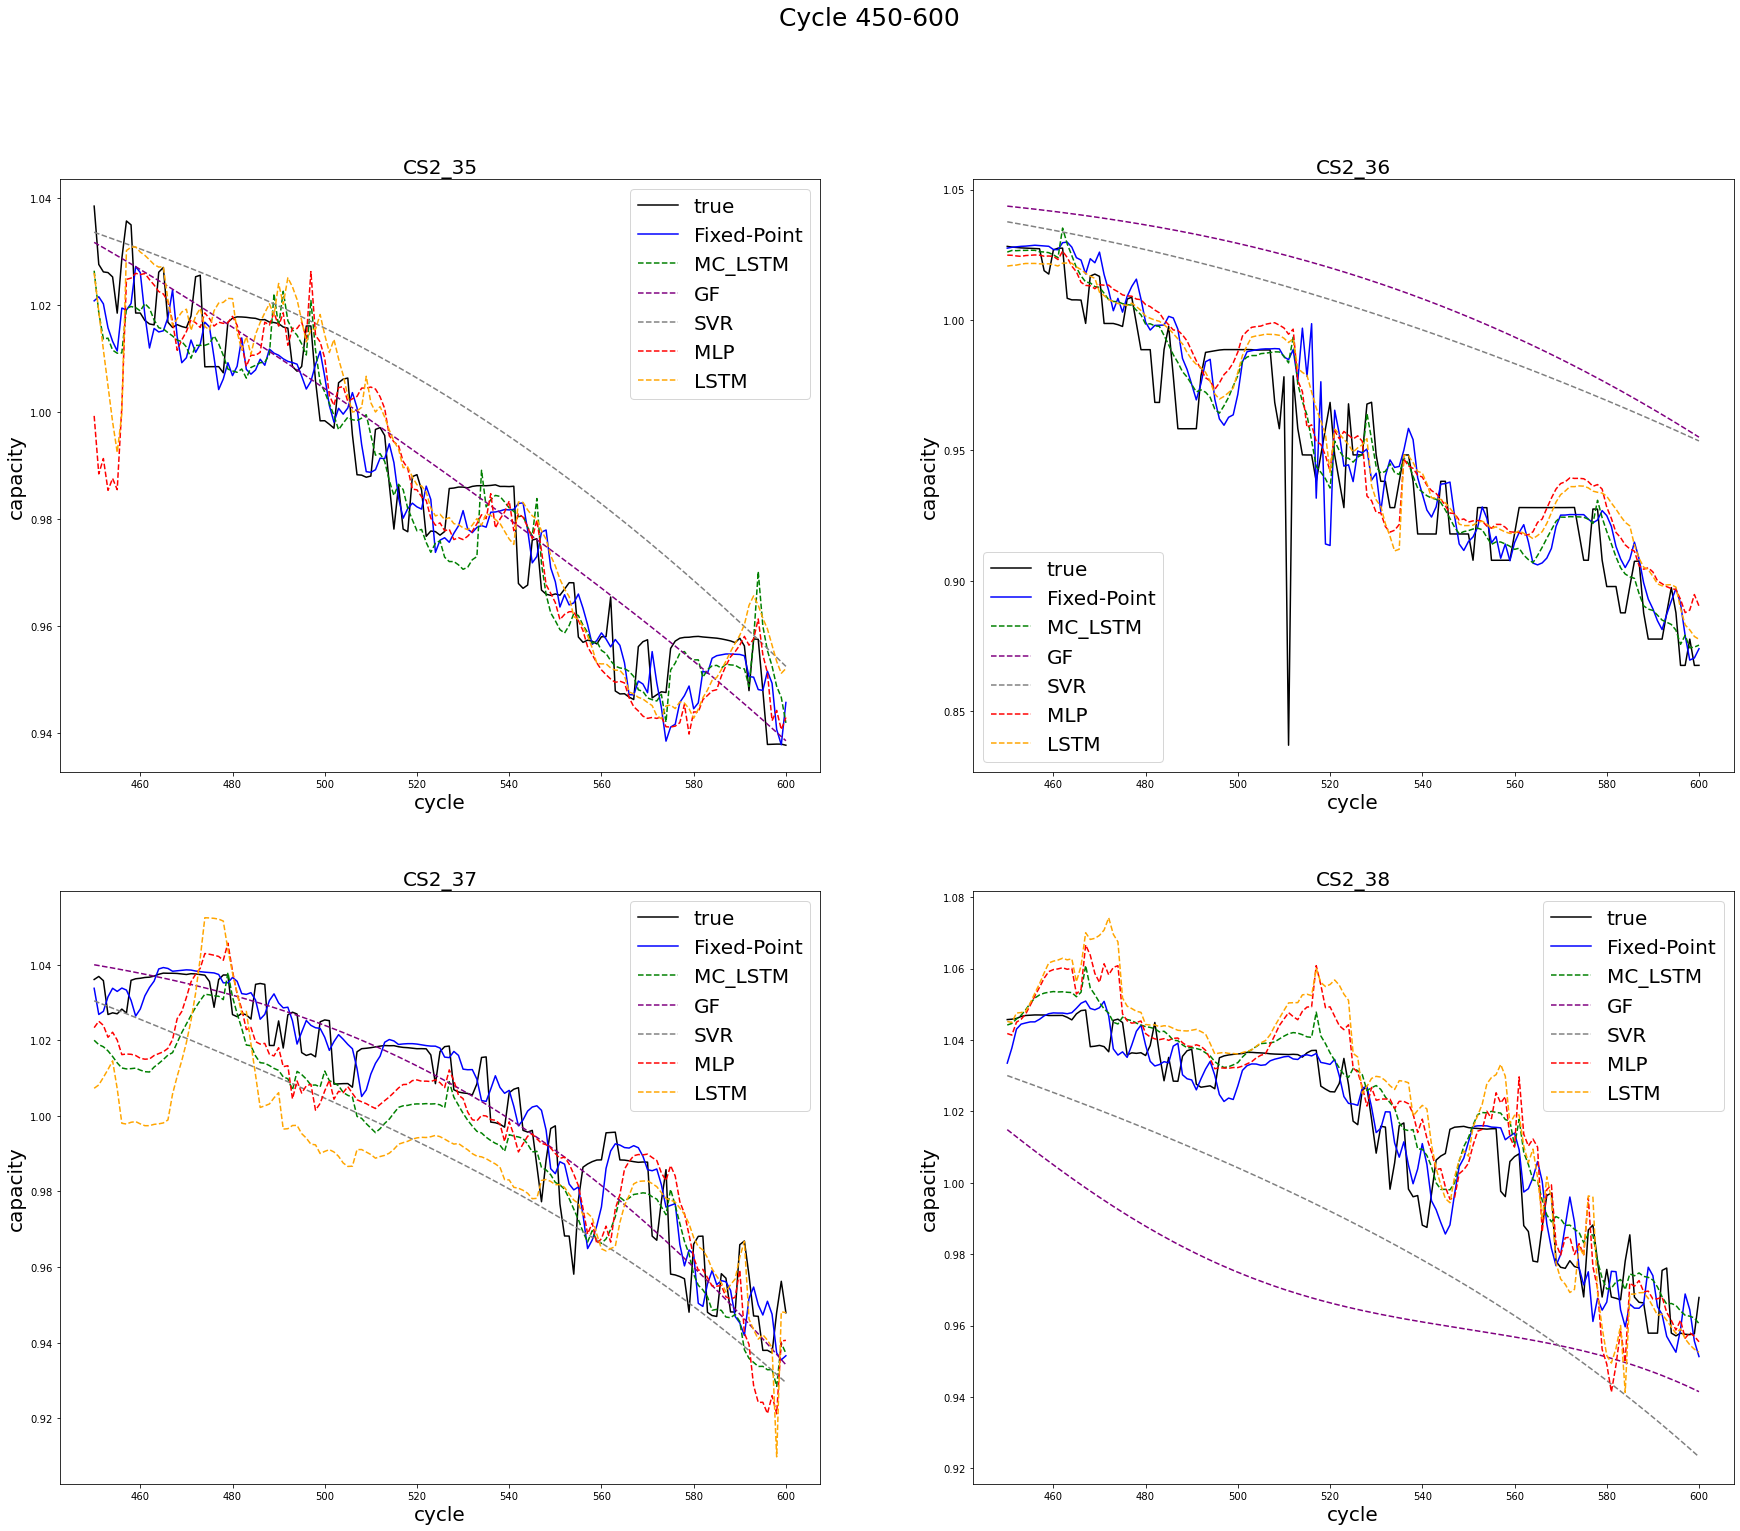

In [44]:
fig, ax = plt.subplots(2,2,figsize=(30,24))
# df['CS2_35'].rename(columns={'truth': 'true'}, inplace=True)
i,j=0,0
for bat in df:
    sns.lineplot(data=df[bat].loc[450:600,'true'],color='black',ax=ax[i,j])
    sns.lineplot(data=df[bat].loc[450:600,'FPX'],color='blue',ax=ax[i,j])
    sns.lineplot(data=df[bat].loc[450:600,'MC_LSTM'],color='g',linestyle="--",ax=ax[i,j])
    sns.lineplot(data=df[bat].loc[450:600,'GF'],color='purple',linestyle="--",ax=ax[i,j])
    sns.lineplot(data=df[bat].loc[450:600,'SVR'],color='gray',linestyle="--",ax=ax[i,j])
    sns.lineplot(data=df[bat].loc[450:600,'MLP'],color='red',linestyle="--",ax=ax[i,j])
    sns.lineplot(data=df[bat].loc[450:600,'LSTM'],color='orange',linestyle="--",ax=ax[i,j])
    ax[i,j].legend(['true','Fixed-Point','MC_LSTM','GF','SVR','MLP','LSTM'],fontsize=20)
    ax[i,j].set_xlabel('cycle',fontsize=20)
    ax[i,j].set_ylabel('capacity',fontsize=20)
    ax[i,j].set_title(bat,fontsize=20)
    j += 1
    if j > 1:
        j = 0
        i += 1
plt.suptitle("Cycle 450-600",fontsize=25)
plt.plot()

[]

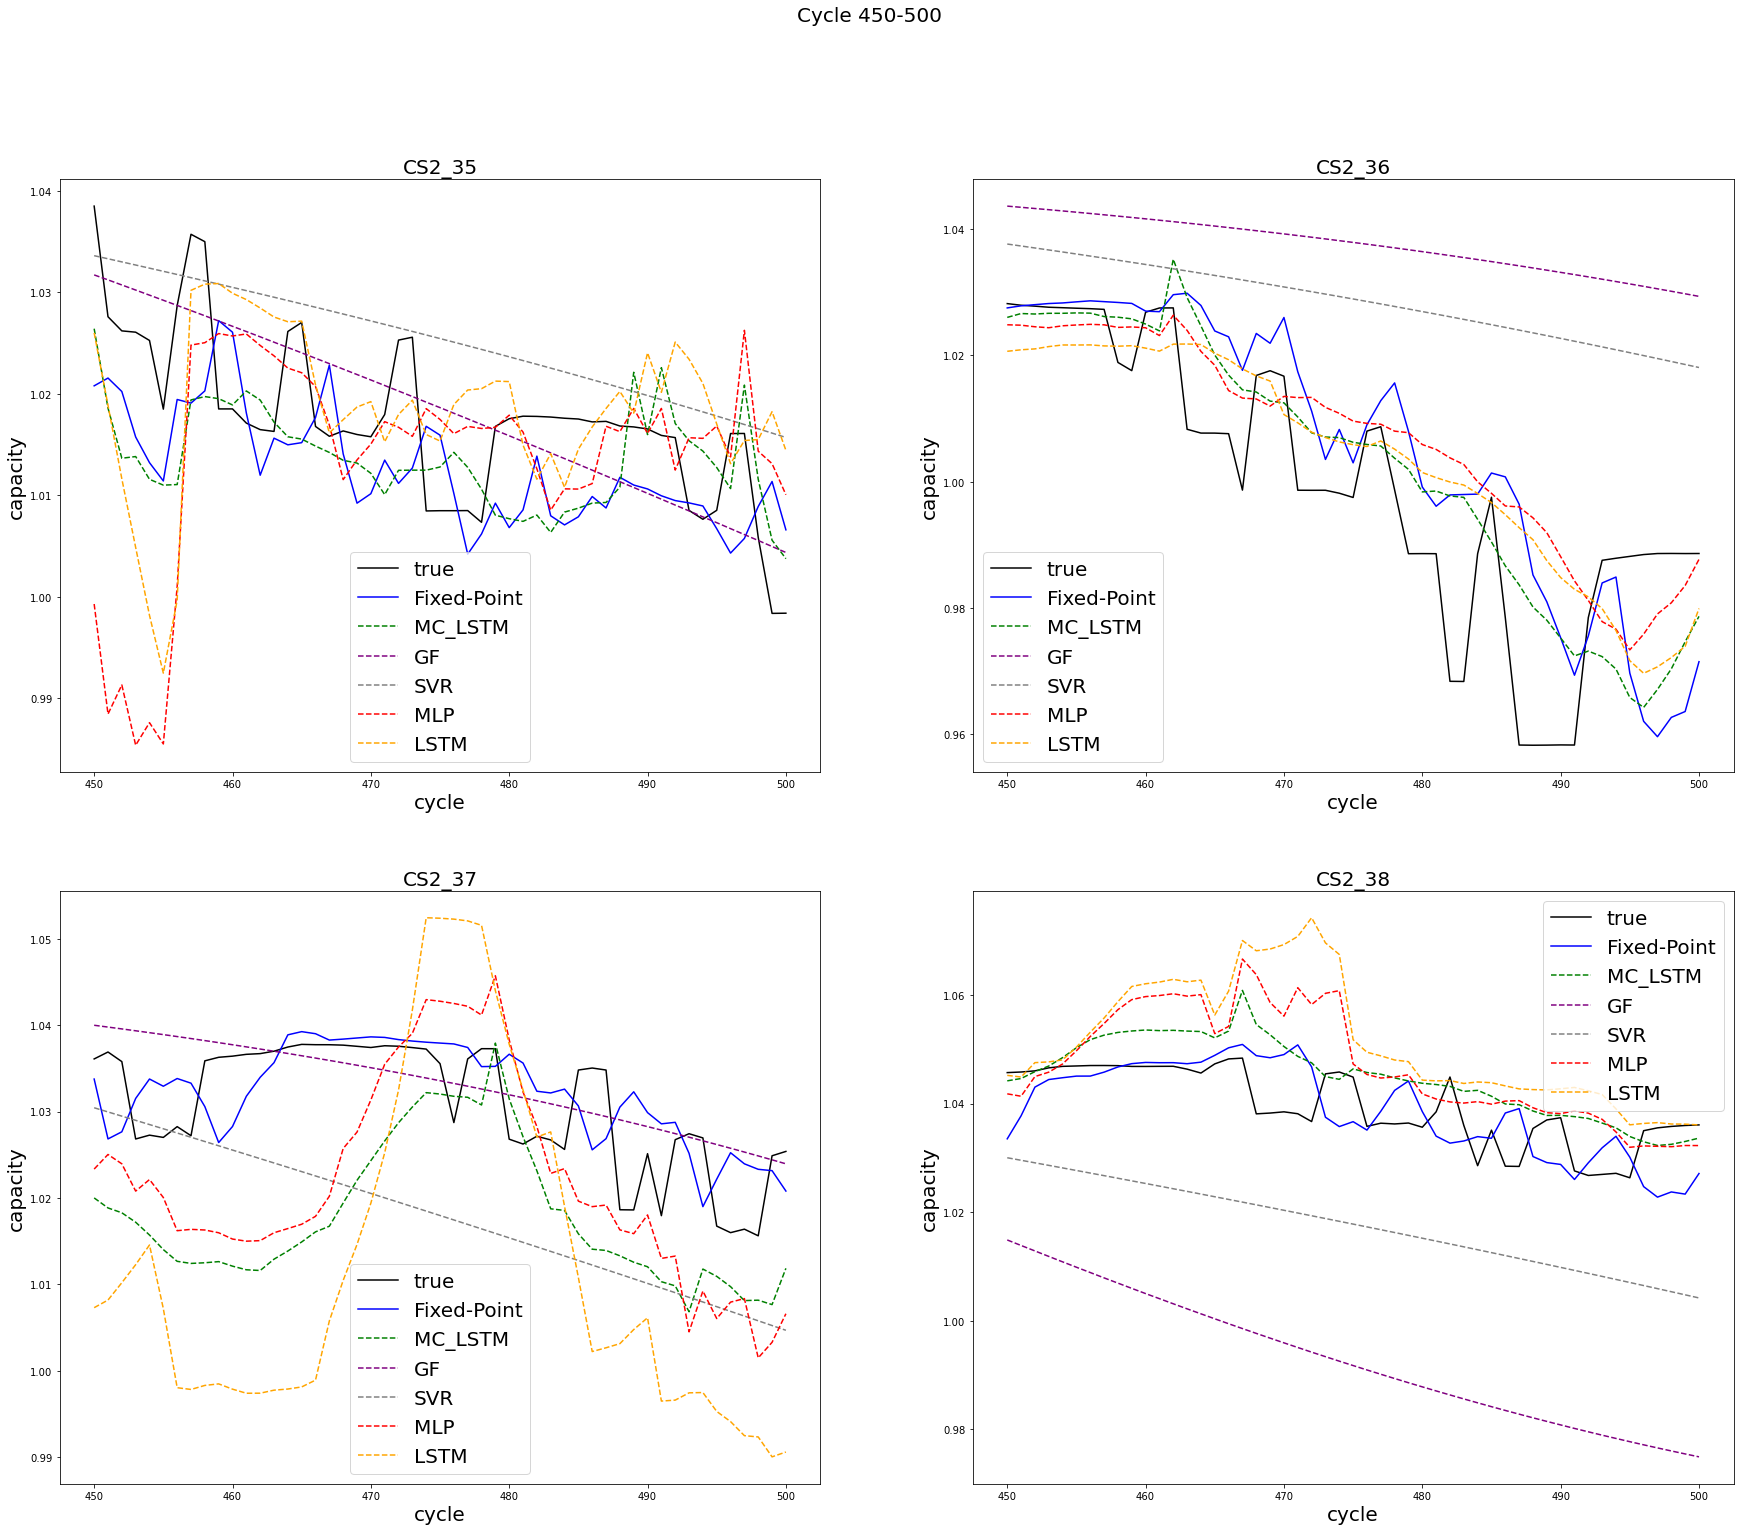

In [45]:
fig, ax = plt.subplots(2,2,figsize=(30,24))
# df['CS2_35'].rename(columns={'truth': 'true'}, inplace=True)
i,j=0,0
for bat in df:
    sns.lineplot(data=df[bat].loc[450:500,'true'],color='black',ax=ax[i,j])
    sns.lineplot(data=df[bat].loc[450:500,'FPX'],color='blue',ax=ax[i,j])
    sns.lineplot(data=df[bat].loc[450:500,'MC_LSTM'],color='g',linestyle="--",ax=ax[i,j])
    sns.lineplot(data=df[bat].loc[450:500,'GF'],color='purple',linestyle="--",ax=ax[i,j])
    sns.lineplot(data=df[bat].loc[450:500,'SVR'],color='gray',linestyle="--",ax=ax[i,j])
    sns.lineplot(data=df[bat].loc[450:500,'MLP'],color='red',linestyle="--",ax=ax[i,j])
    sns.lineplot(data=df[bat].loc[450:500,'LSTM'],color='orange',linestyle="--",ax=ax[i,j])
    ax[i,j].legend(['true','Fixed-Point','MC_LSTM','GF','SVR','MLP','LSTM'],fontsize=20)
    ax[i,j].set_xlabel('cycle',fontsize=20)
    ax[i,j].set_ylabel('capacity',fontsize=20)
    ax[i,j].set_title(bat,fontsize=20)
    j += 1
    if j > 1:
        j = 0
        i += 1
plt.suptitle("Cycle 450-500",fontsize=20)
plt.plot()

[]

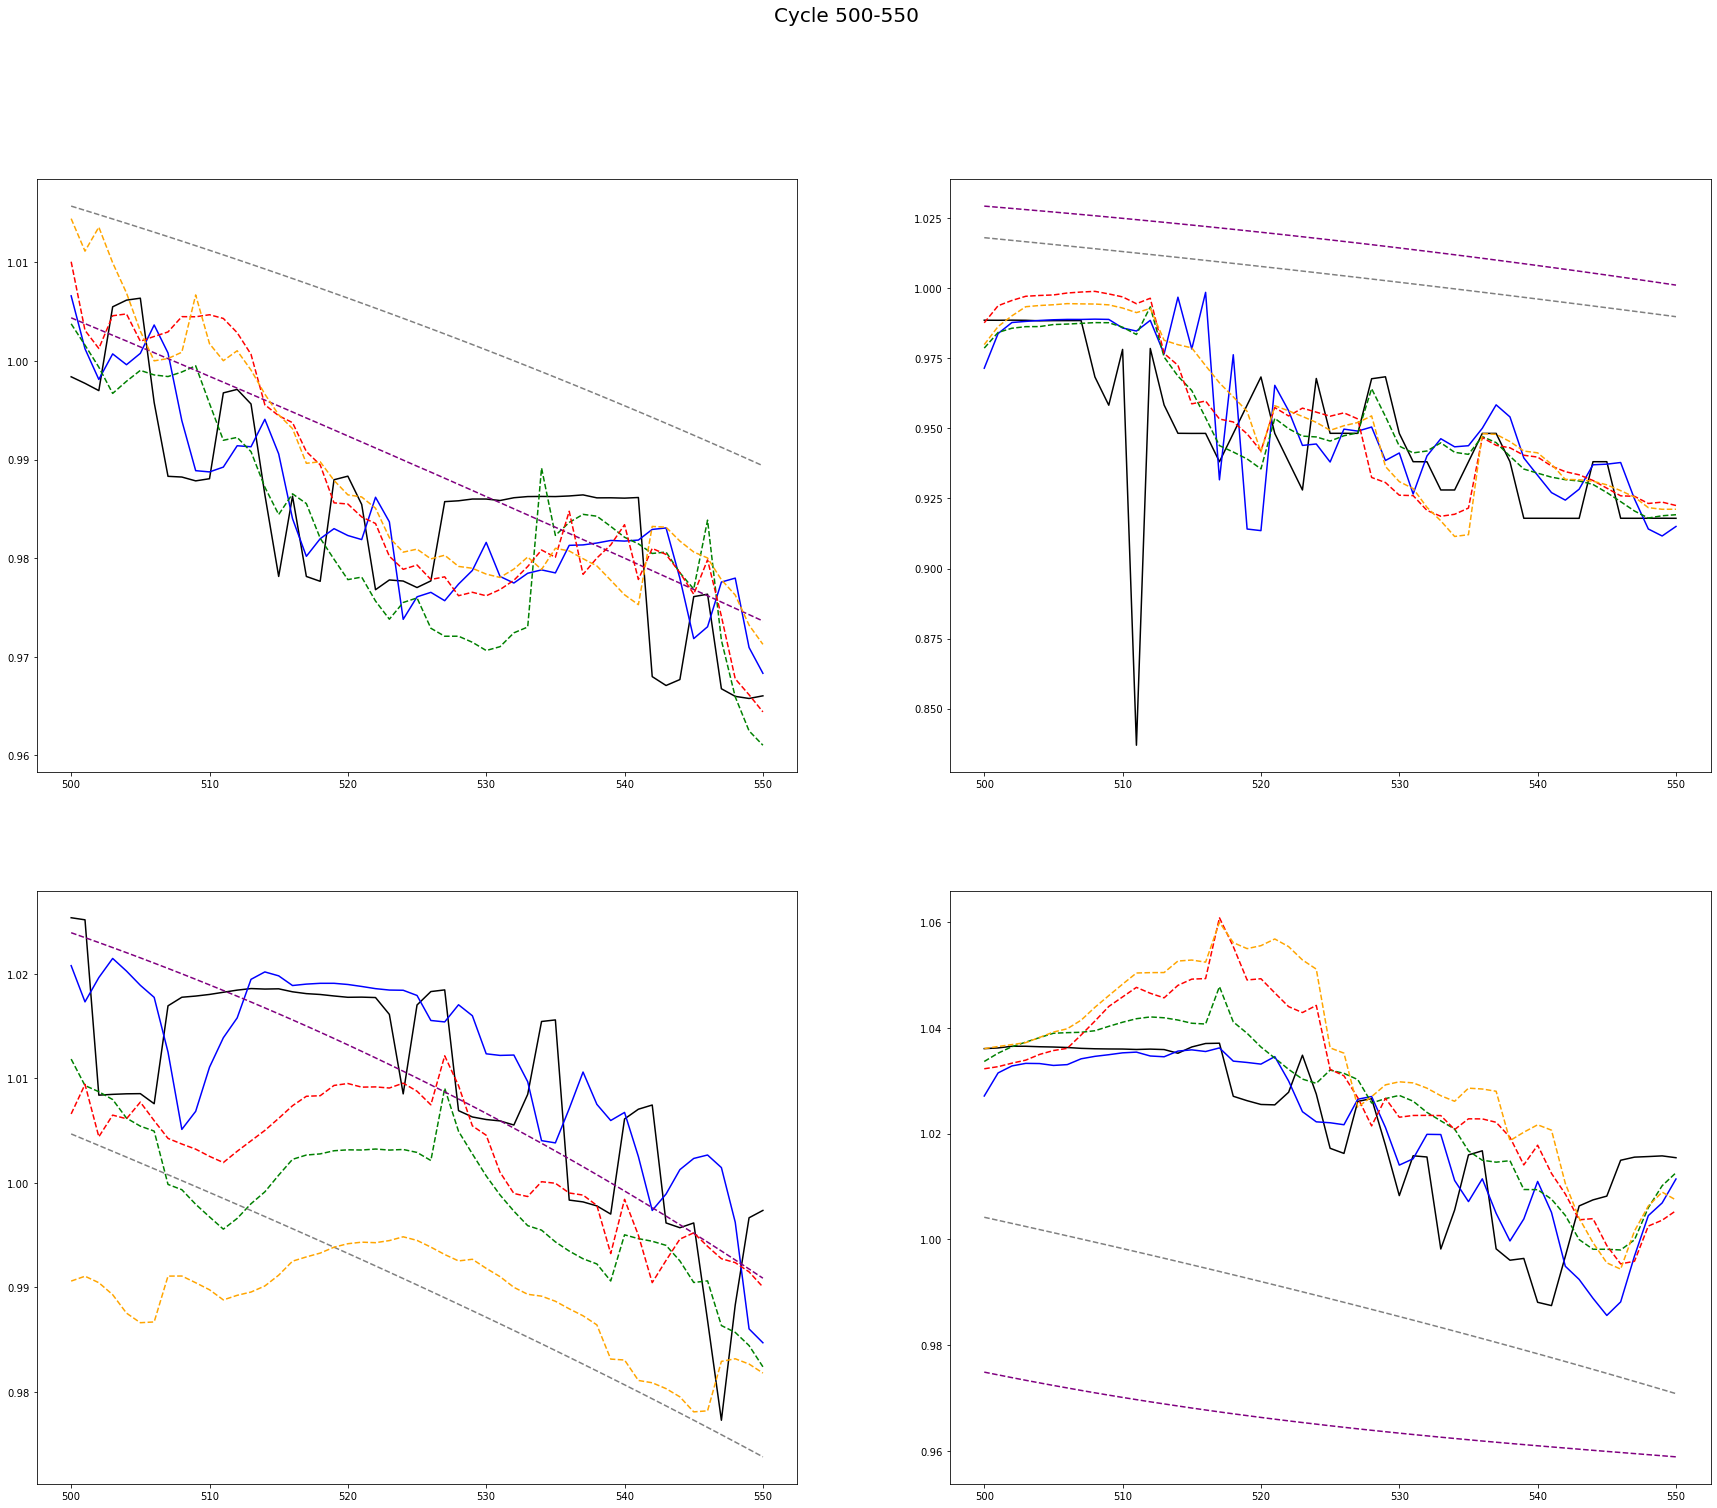

In [22]:
fig, ax = plt.subplots(2,2,figsize=(30,24))
# df['CS2_35'].rename(columns={'truth': 'true'}, inplace=True)
i,j=0,0
for bat in df:
    sns.lineplot(data=df[bat].loc[500:550,'true'],color='black',ax=ax[i,j])
    sns.lineplot(data=df[bat].loc[500:550,'FPX'],color='blue',ax=ax[i,j])
    sns.lineplot(data=df[bat].loc[500:550,'MC_LSTM'],color='g',linestyle="--",ax=ax[i,j])
    sns.lineplot(data=df[bat].loc[500:550,'GF'],color='purple',linestyle="--",ax=ax[i,j])
    sns.lineplot(data=df[bat].loc[500:550,'SVR'],color='gray',linestyle="--",ax=ax[i,j])
    sns.lineplot(data=df[bat].loc[500:550,'MLP'],color='red',linestyle="--",ax=ax[i,j])
    sns.lineplot(data=df[bat].loc[500:550,'LSTM'],color='orange',linestyle="--",ax=ax[i,j])
#     ax[i,j].legend(['true','Fixed-Point','MC_LSTM','GF','SVR','MLP','LSTM'],fontsize=20)
#     ax[i,j].set_xlabel('cycle',fontsize=20)
#     ax[i,j].set_ylabel('capacity',fontsize=20)
#     ax[i,j].set_title(bat,fontsize=20)
    ax[i,j].set_ylabel(None)
    j += 1
    if j > 1:
        j = 0
        i += 1
plt.suptitle("Cycle 500-550",fontsize=20)
plt.plot()

[]

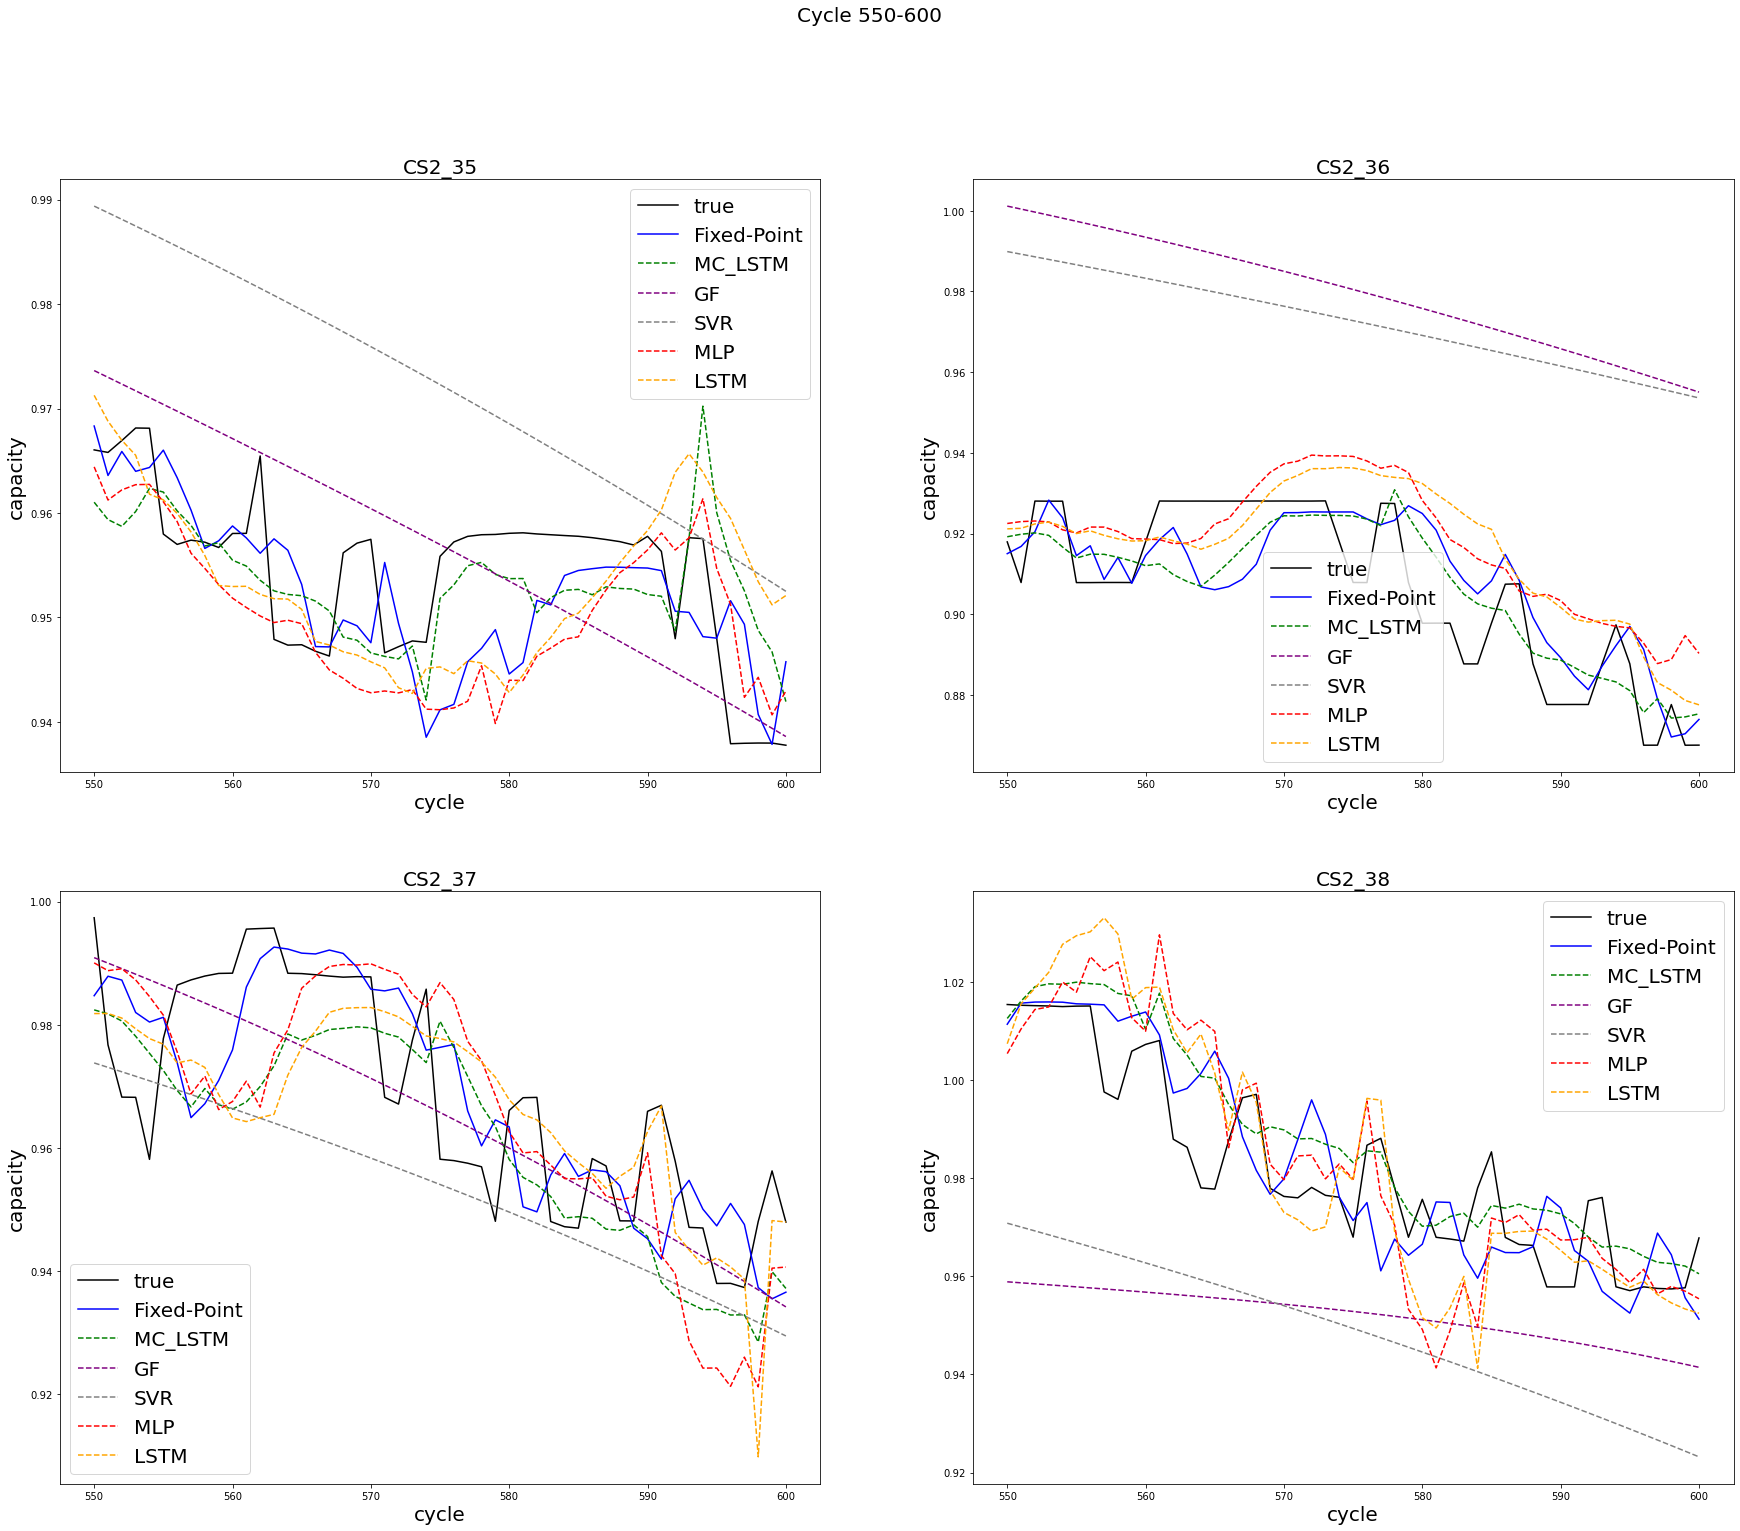

In [47]:
fig, ax = plt.subplots(2,2,figsize=(30,24))
# df['CS2_35'].rename(columns={'truth': 'true'}, inplace=True)
i,j=0,0
for bat in df:
    sns.lineplot(data=df[bat].loc[550:600,'true'],color='black',ax=ax[i,j])
    sns.lineplot(data=df[bat].loc[550:600,'FPX'],color='blue',ax=ax[i,j])
    sns.lineplot(data=df[bat].loc[550:600,'MC_LSTM'],color='g',linestyle="--",ax=ax[i,j])
    sns.lineplot(data=df[bat].loc[550:600,'GF'],color='purple',linestyle="--",ax=ax[i,j])
    sns.lineplot(data=df[bat].loc[550:600,'SVR'],color='gray',linestyle="--",ax=ax[i,j])
    sns.lineplot(data=df[bat].loc[550:600,'MLP'],color='red',linestyle="--",ax=ax[i,j])
    sns.lineplot(data=df[bat].loc[550:600,'LSTM'],color='orange',linestyle="--",ax=ax[i,j])
    ax[i,j].legend(['true','Fixed-Point','MC_LSTM','GF','SVR','MLP','LSTM'],fontsize=20)
    ax[i,j].set_xlabel('cycle',fontsize=20)
    ax[i,j].set_ylabel('capacity',fontsize=20)
    ax[i,j].set_title(bat,fontsize=20)
    j += 1
    if j > 1:
        j = 0
        i += 1
plt.suptitle("Cycle 550-600",fontsize=20)
plt.plot()